
Distances to Class Means:
Class 1: 64.19
Class 2: 159.78
Class 3: 1461.42

Closest Class: Class 1


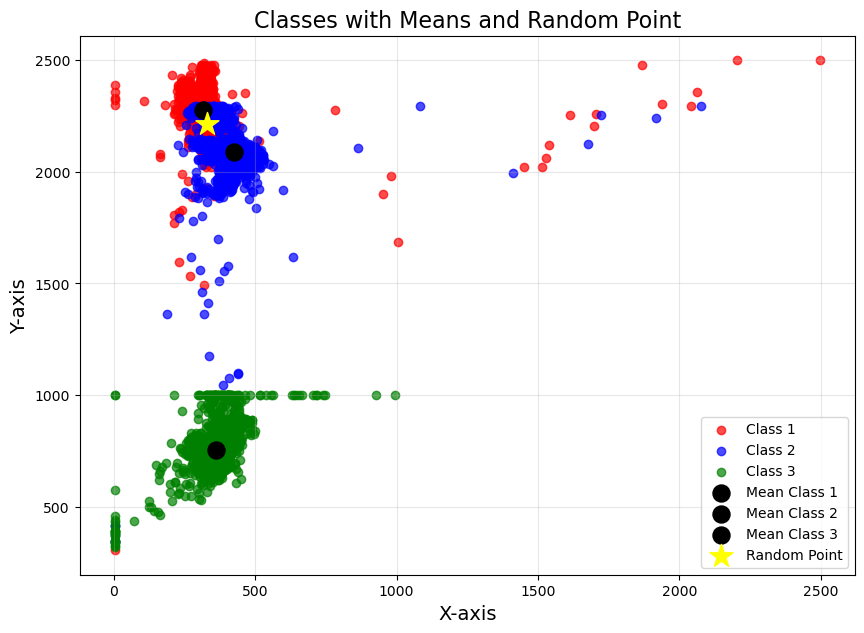

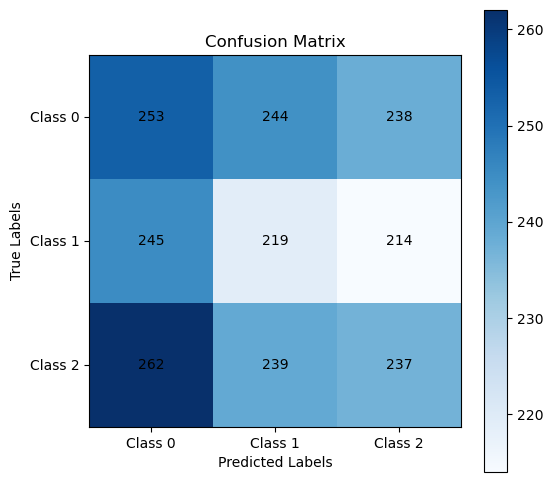


Metrics per Class:
Class 0: Precision = 0.33, Recall = 0.34, F1-Score = 0.34
Class 1: Precision = 0.31, Recall = 0.32, F1-Score = 0.32
Class 2: Precision = 0.34, Recall = 0.32, F1-Score = 0.33


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

# Load datasets with space delimiter
def load_and_format_data(filepath):
    data = pd.read_csv(filepath, delimiter=' ', header=None)
    if data.shape[1] == 2:
        data.columns = ['X', 'Y']
    else:
        data.columns = ['X', 'Y'] + [f'Feature_{i}' for i in range(3, data.shape[1] + 1)]
    return data

class1 = load_and_format_data('desktop/internship/dataset/rd_group5/class1.txt')
class2 = load_and_format_data('desktop/internship/dataset/rd_group5/class2.txt')
class3 = load_and_format_data('desktop/internship/dataset/rd_group5/class3.txt')

# Combine datasets
combined_dataset = pd.concat([class1, class2, class3], ignore_index=True)


# Features and Labels
X = combined_dataset[['X', 'Y']]
y = np.concatenate([np.zeros(len(class1)), np.ones(len(class2)), np.full(len(class3), 2)])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculate class means
class_means = {
    'Class 1': [class1['X'].mean(), class1['Y'].mean()],
    'Class 2': [class2['X'].mean(), class2['Y'].mean()],
    'Class 3': [class3['X'].mean(), class3['Y'].mean()]
}

# Random Point Distance Calculation
random_point = X.sample(n=1).values.flatten()

def calculate_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2)) ** 2))

distances = {class_name: calculate_distance(random_point, mean) for class_name, mean in class_means.items()}

print("\nDistances to Class Means:")
for class_name, distance in distances.items():
    print(f"{class_name}: {distance:.2f}")

closest_class = min(distances, key=distances.get)
print(f"\nClosest Class: {closest_class}")

# Scatter Plot with Class Means and Random Point
plt.figure(figsize=(10, 7))
plt.scatter(class1['X'], class1['Y'], color='red', label='Class 1', alpha=0.7)
plt.scatter(class2['X'], class2['Y'], color='blue', label='Class 2', alpha=0.7)
plt.scatter(class3['X'], class3['Y'], color='green', label='Class 3', alpha=0.7)
for class_name, mean in class_means.items():
    plt.scatter(mean[0], mean[1], color='black', marker='o', s=150, label=f"Mean {class_name}")
plt.scatter(random_point[0], random_point[1], color='yellow', marker='*', s=300, label='Random Point')
plt.title("Classes with Means and Random Point", fontsize=16)
plt.xlabel("X-axis", fontsize=14)
plt.ylabel("Y-axis", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Confusion Matrix and Metrics
def confusion_matrix_manual(y_true, y_pred, num_classes):
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for i in range(len(y_true)):
        cm[int(y_true[i]), int(y_pred[i])] += 1
    return cm

# Placeholder: Simulating predictions (replace with actual model predictions)
y_pred = np.random.choice([0, 1, 2], size=len(y_test))  # Replace this with actual predictions

cm = confusion_matrix_manual(y_test, y_pred, num_classes=len(class_means))

def plot_confusion_matrix(cm):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, cmap="Blues")
    plt.colorbar()
    plt.xticks(range(len(cm)), labels=[f"Class {i}" for i in range(len(cm))])
    plt.yticks(range(len(cm)), labels=[f"Class {i}" for i in range(len(cm))])
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='black')
    plt.show()

plot_confusion_matrix(cm)

# Precision, Recall, F1-Score
precision, recall, f1_score = [], [], []

for i in range(len(class_means)):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    precision_i = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall_i = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score_i = (2 * precision_i * recall_i) / (precision_i + recall_i) if (precision_i + recall_i) > 0 else 0
    precision.append(precision_i)
    recall.append(recall_i)
    f1_score.append(f1_score_i)

print("\nMetrics per Class:")
for i in range(len(class_means)):
    print(f"Class {i}: Precision = {precision[i]:.2f}, Recall = {recall[i]:.2f}, F1-Score = {f1_score[i]:.2f}")


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


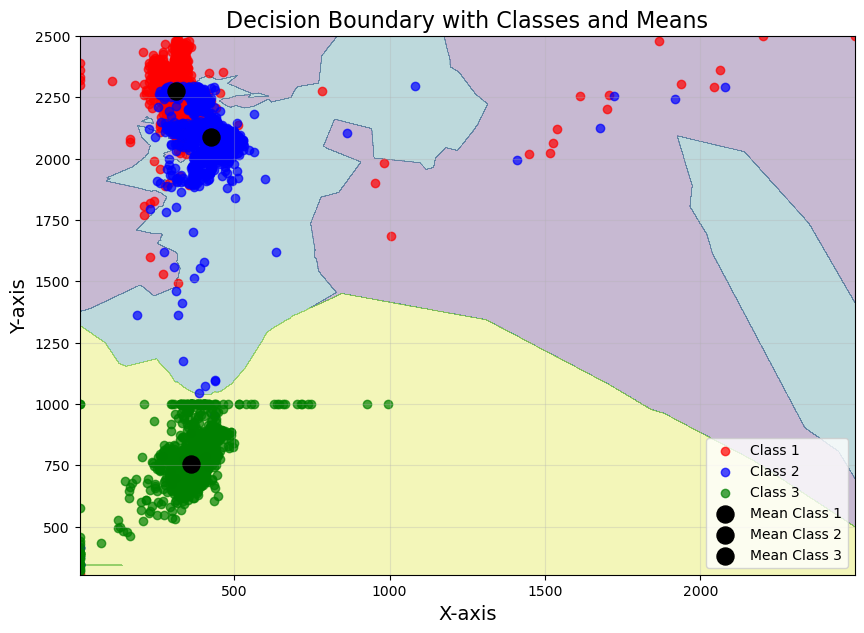

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Features and Labels
X = combined_dataset[['X', 'Y']]
y = np.concatenate([np.zeros(len(class1)), np.ones(len(class2)), np.full(len(class3), 2)])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Create meshgrid for decision boundary
x_min, x_max = X['X'].min() - 1, X['X'].max() + 1
y_min, y_max = X['Y'].min() - 1, X['Y'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict class labels for each point in the meshgrid
y_pred_grid = knn.predict(grid_points)
y_pred_grid = y_pred_grid.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 7))

# Plot decision boundary
plt.contourf(xx, yy, y_pred_grid, alpha=0.3, cmap="viridis")

# Plot data points
plt.scatter(class1['X'], class1['Y'], color='red', label='Class 1', alpha=0.7)
plt.scatter(class2['X'], class2['Y'], color='blue', label='Class 2', alpha=0.7)
plt.scatter(class3['X'], class3['Y'], color='green', label='Class 3', alpha=0.7)

# Scatter for class means
for class_name, mean in {'Class 1': [class1['X'].mean(), class1['Y'].mean()],
                         'Class 2': [class2['X'].mean(), class2['Y'].mean()],
                         'Class 3': [class3['X'].mean(), class3['Y'].mean()]}.items():
    plt.scatter(mean[0], mean[1], color='black', marker='o', s=150, label=f"Mean {class_name}")

plt.title("Decision Boundary with Classes and Means", fontsize=16)
plt.xlabel("X-axis", fontsize=14)
plt.ylabel("Y-axis", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()
